#### protein fdr 0.01 and psm fdr 0.01.  The data were searched against 3659 E. coli entries, including sequences of 13 spiked proteins. The database may different from IsoProt and reference paper, which has impact on the final result.

In [1]:
%load_ext rpy2.ipython

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [3]:
# preprocess out_msstats.csv
import gzip
import pandas as pd

def remove_decoy(Pro):
    if "CONTAMINANT" in Pro or "DECOY_" in Pro:
        t = []
        for p in Pro.split(";"):
            if "CONTAMINANT" in p or "DECOY_" in p:
                pass
            else:
                t.append(p)
        if len(t) == 0:
            return None
        return ";".join(t)
    else:
        return Pro
    
path = "../datasets/PXD005486/out_msstats.csv.gz"
f_name = path.replace(".gz", "")
g_file = gzip.GzipFile(path)
with open(f_name, "wb+") as f:
    f.write(g_file.read())
            
data = pd.read_csv("../datasets/PXD005486/out_msstats.csv", sep=",")
data['ProteinName'] = data.apply(lambda x: remove_decoy(x.ProteinName), axis=1)
data.dropna(inplace=True)
data.to_csv("../datasets/PXD005486/out_msstats_pre.csv", index=False, sep=",")

INFO  [2021-09-11 19:55:18] ** Raw data from OpenMS imported successfully.
INFO  [2021-09-11 19:55:19] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-09-11 19:55:19] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-09-11 19:55:19] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-09-11 19:55:19] ** Shared peptides are removed.
INFO  [2021-09-11 19:55:19] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-09-11 19:55:36] ** PSMs have been aggregated to peptide ions.
INFO  [2021-09-11 19:55:39] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-09-11 19:55:39] ** Fractions belongin

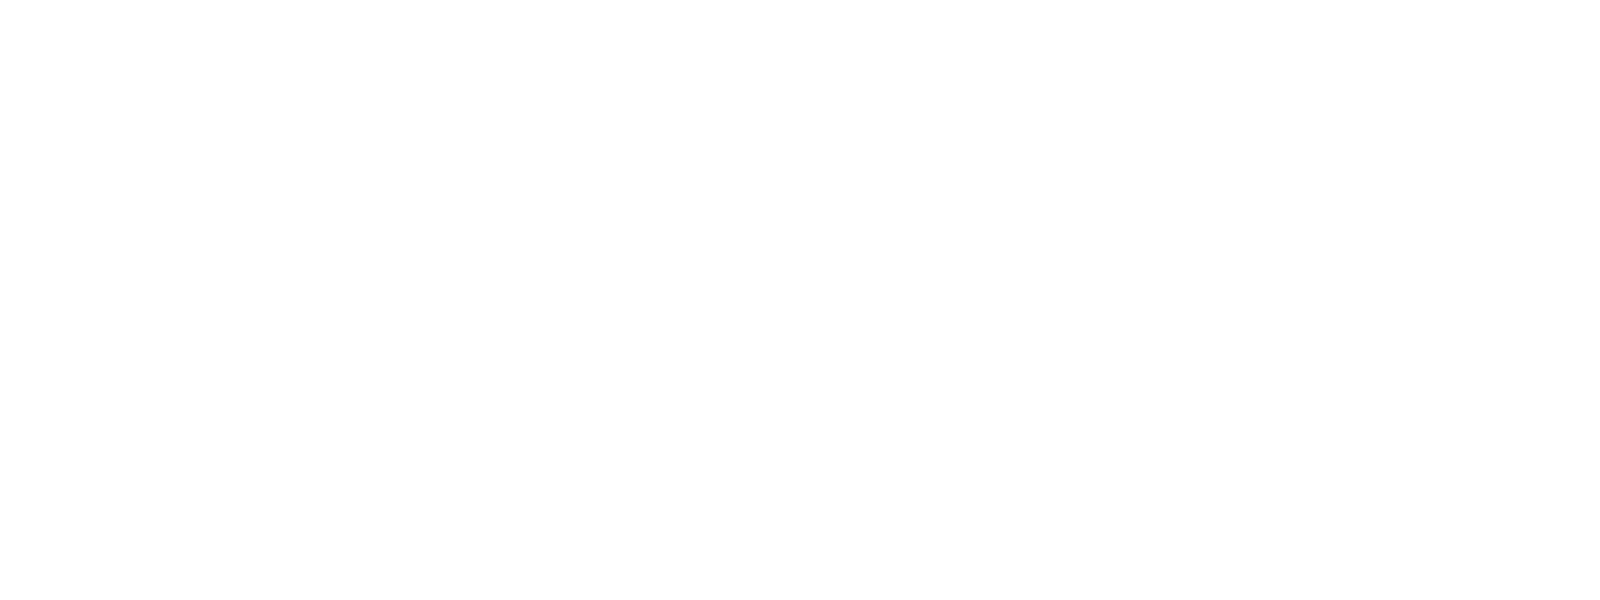

In [3]:
%%R -w 1600 -h 600

library('MSstatsTMT', warn.conflicts = F, quietly = T, verbose = F)
data_folder = '../datasets/PXD005486'
setwd(data_folder)
openms_output = './out_msstats_pre.csv'
raw.om <- read.csv(openms_output, header = TRUE, sep = ',')
input.om <- OpenMStoMSstatsTMTFormat(raw.om)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




INFO  [2021-09-11 16:01:33] ** MSstatsTMT - proteinSummarization function
INFO  [2021-09-11 16:01:33] Summarizing for Run : 1_1_1 ( 1  of  1 )
  |======================================================================| 100%
INFO  [2021-09-11 16:01:52] ** Protein-level summarization done by MSstats.


R[write to console]: Drew the Profile plot for 1 proteins.



  |======================================================================| 100%


R[write to console]: Drew the Profile plot with summarization for 1 proteins.



  |======================================================================| 100%


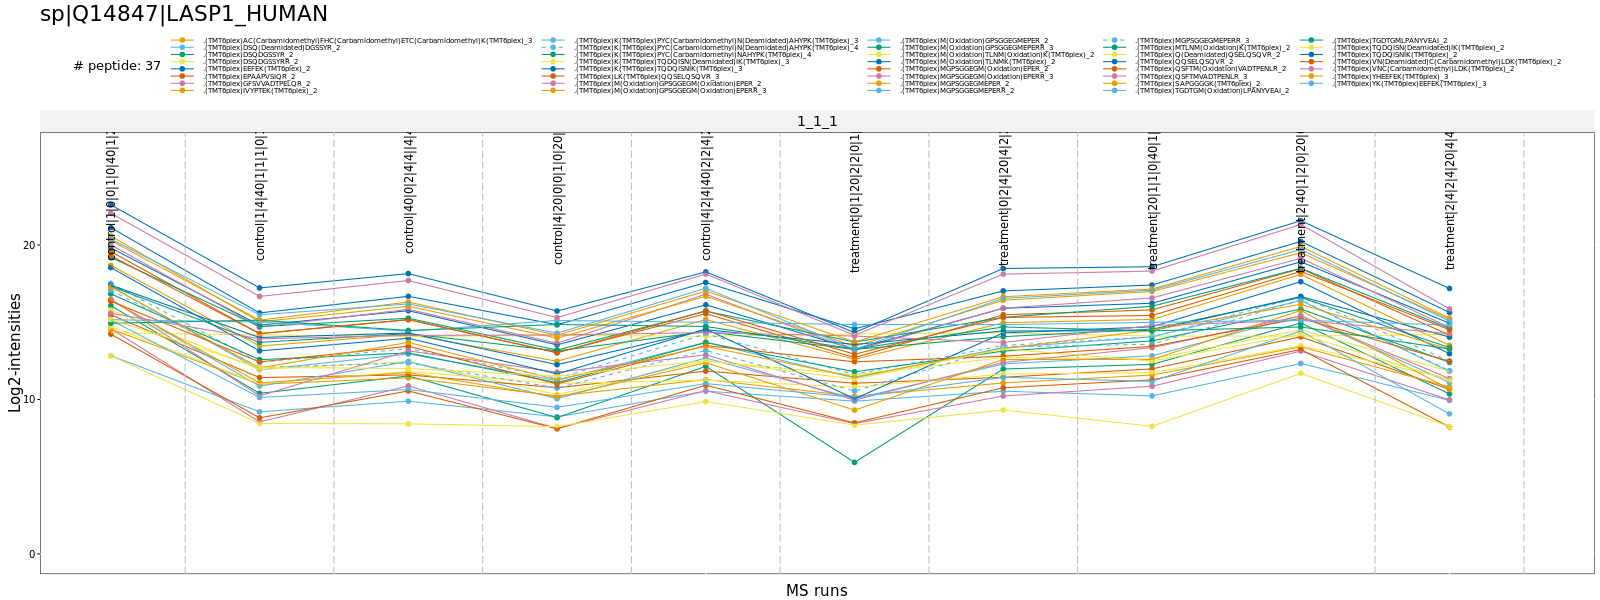

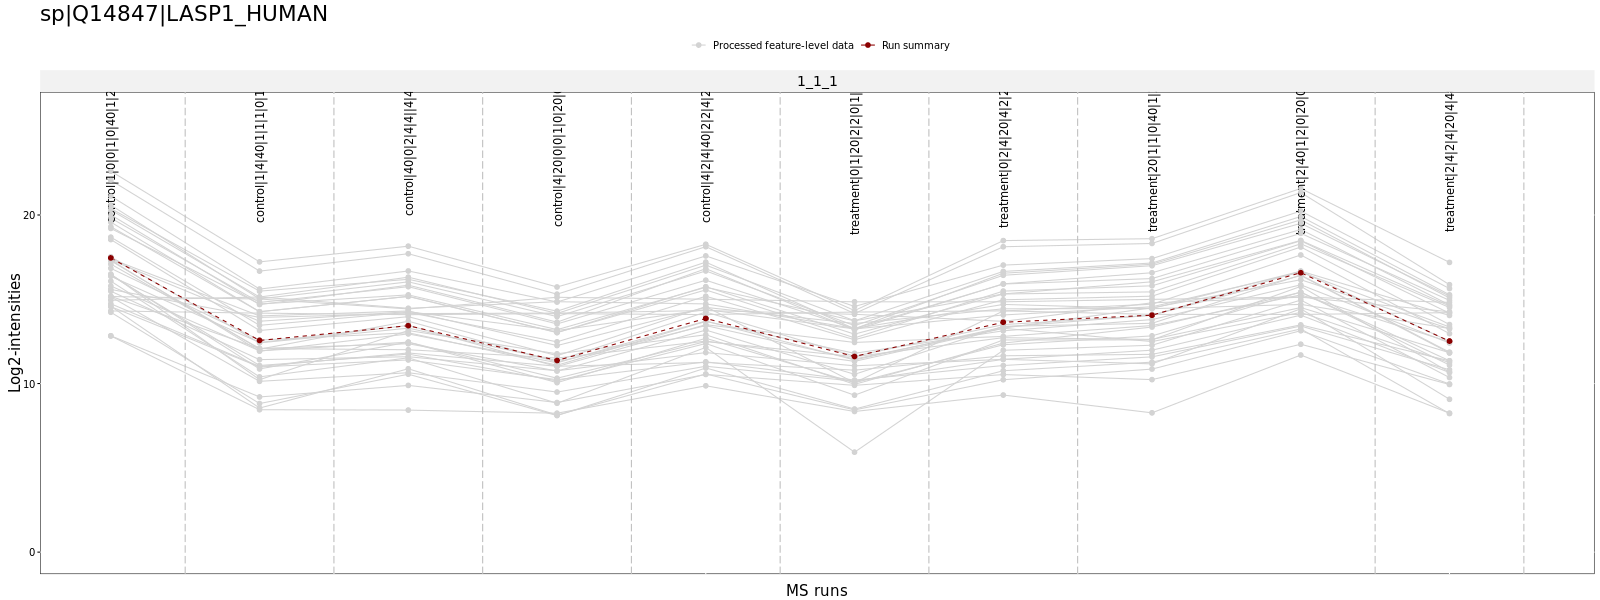

In [4]:
%%R -w 1600 -h 600

library("dplyr")
input.om$Condition = data.frame(input.om)%>%select(Condition)%>%
    mutate(Condition=case_when(input.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"control|1|0|0|1|0|40|1|2|2|0|40|4|21",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"control|4|20|0|0|1|0|20|0|1|40|2|2|64",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"control|40|0|2|4|4||4|4|1|2|2|20|1",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"control|1|4|40|1|1|1|0|1|40|1|0|1|79",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"control|4|2|4|40|2|2|4|20|1|4|4|0|81",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"treatment|0|2|4|20|4|2|2|4|2|2|4|40|5",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"treatment|20|1|1|0|40|1|2|0|20|0|1|1|0",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"treatment|2|40|1|2|0|20|0|2|0|1|20|4|32",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"treatment|0|1|20|2|2|0|1|40|0|20|1|0|85",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"treatment|2|4|2|4|20|4|40|4|4|4|0|2|12"))


# use MSstatsTMT for protein summarization
quant_om.msstats <- proteinSummarization(input.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

## Profile plot without norm channnels and empty channels
dataProcessPlotsTMT(data=quant_om.msstats,
                     type = 'ProfilePlot',
                     which.Protein = 'sp|Q14847|LASP1_HUMAN',  # spiked-in protein
                     width = 25, # adjust the figure width 
                     height = 12,
                     address=FALSE)


In [5]:
%%R

head(input.om$Condition)

                                Condition
1   treatment|0|2|4|20|4|2|2|4|2|2|4|40|5
2  treatment|20|1|1|0|40|1|2|0|20|0|1|1|0
3 treatment|2|40|1|2|0|20|0|2|0|1|20|4|32
4 treatment|0|1|20|2|2|0|1|40|0|20|1|0|85
5  treatment|2|4|2|4|20|4|40|4|4|4|0|2|12
6    control|1|0|0|1|0|40|1|2|2|0|40|4|21


### The fold changes of E.coli background proteins 

#### Result:  This represents the expression of background proteins based on a comparison of the first five channels against the other five. The estimated log-fold changes are most closely centered around 0. As expected, no proteins were identified as being significantly regulated (Based on log2FC and pvalue or FDR 0.05).  Another thing to note is that number of quantified proteins less than reference paper (1110~2407). May be related to fasta database and filter.

In [6]:
%%R

input.om$Condition = data.frame(input.om)%>%select(Condition)%>%
    mutate(Condition=case_when(input.om$Condition == "control|1|0|0|1|0|40|1|2|2|0|40|4|21"~"control",
        input.om$Condition == "control|4|20|0|0|1|0|20|0|1|40|2|2|64"~"control",
        input.om$Condition == "control|40|0|2|4|4||4|4|1|2|2|20|1"~"control",
        input.om$Condition == "control|1|4|40|1|1|1|0|1|40|1|0|1|79"~"control",
        input.om$Condition == "control|4|2|4|40|2|2|4|20|1|4|4|0|81"~"control",
        input.om$Condition == "treatment|0|2|4|20|4|2|2|4|2|2|4|40|5"~"treatment",
        input.om$Condition == "treatment|20|1|1|0|40|1|2|0|20|0|1|1|0"~"treatment",
        input.om$Condition == "treatment|2|40|1|2|0|20|0|2|0|1|20|4|32"~"treatment",
        input.om$Condition == "treatment|0|1|20|2|2|0|1|40|0|20|1|0|85"~"treatment",
        input.om$Condition == "treatment|2|4|2|4|20|4|40|4|4|4|0|2|12"~"treatment"))



quant_om.msstats <- proteinSummarization(input.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

levels(quant_om.msstats$ProteinLevelData$Condition)

INFO  [2021-09-11 16:02:09] ** MSstatsTMT - proteinSummarization function
INFO  [2021-09-11 16:02:09] Summarizing for Run : 1_1_1 ( 1  of  1 )
  |======================================================================| 100%
INFO  [2021-09-11 16:02:28] ** Protein-level summarization done by MSstats.
[1] "control"   "treatment"


In [15]:
%%R -w 1000 -h 600

TMT_Comp<-matrix(c(-1, 1), nrow=1)
row.names(TMT_Comp)<-c("treatment vs control")
colnames(TMT_Comp) = c("control","treatment")


TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)

head(TMT_Comp.pairwise$ComparisonResult)

INFO  [2021-09-11 16:06:13] Model fitting for 1110 proteins.
  |======================================================================| 100%
INFO  [2021-09-11 16:06:21] Testing for 1110 proteins:
  |======================================================================| 100%
                                                                                                                                                                                                                                                                            Protein
1:                                                                                                                                                                                                                                                         sp|A0A0H2VDI7|CYCA_ECOL6
2:                                                                                                                                                                          

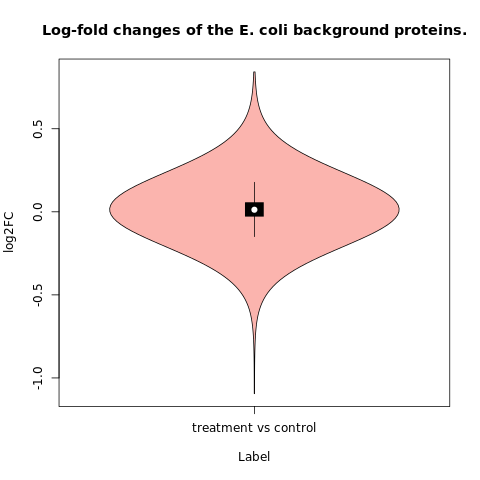

In [16]:
%%R

library(vioplot)

vioplot(log2FC~Label, data=TMT_Comp.pairwise$ComparisonResult[ grep("ENOA_HUMAN|ARGI1_HUMAN|FABP4_HUMAN|TEBP_HUMAN|IMA1_HUMAN|LASP1_HUAMN|HDAC3_HUMAN|CSEN_HUMAN|OTUB1_HUMAN|GBRL1_HUMAN|GAS7_HUMAN|EZRI_HUMAN|ALBU_BOVIN",TMT_Comp.pairwise$ComparisonResult$Protein, invert = TRUE), ], 
        main="Log-fold changes of the E. coli background proteins.", col=c("#FBB4AE"))

### Observed bias and RMSE of estimated fold-changes of the D’Angelo et al. benchmark data set from our pipeline , the best-performing pipeline published by the authors and IsoProt.

In [10]:
%%R -w 1600 -h 600

library('MSstatsTMT', warn.conflicts = F, quietly = T, verbose = F)
library(dplyr)
openms_output = './out_msstats_pre.csv'
raw.om <- read.csv(openms_output, header = TRUE, sep = ',')
ENO1.om <- OpenMStoMSstatsTMTFormat(raw.om)
ENO1.om$Condition = data.frame(ENO1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=ENO1;QY=1 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=ENO1;QY=4 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=ENO1;QY=40 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=ENO1;QY=1 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=ENO1;QY=4 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=ENO1;QY=0 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=ENO1;QY=20 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=ENO1;QY=2 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=ENO1;QY=0 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=ENO1;QY=2 pmol"))

quant_om.msstats <- proteinSummarization(ENO1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

TMT_Comp<-matrix(c(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c("CT=protein;AC=ENO1;QY=0 pmol", "CT=protein;AC=ENO1;QY=4 pmol", "CT=protein;AC=ENO1;QY=20 pmol", "CT=protein;AC=ENO1;QY=2 pmol", "CT=protein;AC=ENO1;QY=40 pmol", "CT=protein;AC=ENO1;QY=1 pmol")
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)

ENO1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P06733|ENOA_HUMAN"]
ENO1FC

INFO  [2021-09-11 13:12:36] ** Raw data from OpenMS imported successfully.
INFO  [2021-09-11 13:12:37] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-09-11 13:12:37] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-09-11 13:12:37] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-09-11 13:12:37] ** Shared peptides are removed.
INFO  [2021-09-11 13:12:37] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-09-11 13:12:52] ** PSMs have been aggregated to peptide ions.
INFO  [2021-09-11 13:12:53] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-09-11 13:12:53] ** Fractions belongin

In [11]:
%%R

ARGI1.om <- OpenMStoMSstatsTMTFormat(raw.om)
ARGI1.om$Condition = data.frame(ARGI1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=ARG1;QY=0 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=ARG1;QY=20 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=ARG1;QY=0 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=ARG1;QY=4 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=ARG1;QY=2 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=ARG1;QY=2 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=ARG1;QY=1 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=ARG1;QY=40 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=ARG1;QY=1 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=ARG1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(ARGI1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

TMT_Comp<-matrix(c(1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=ARG1;QY=2 pmol','CT=protein;AC=ARG1;QY=1 pmol','CT=protein;AC=ARG1;QY=40 pmol','CT=protein;AC=ARG1;QY=4 pmol','CT=protein;AC=ARG1;QY=0 pmol','CT=protein;AC=ARG1;QY=20 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)

ARG1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P05089|ARGI1_HUMAN"]
ARG1FC

INFO  [2021-09-11 13:13:35] ** Raw data from OpenMS imported successfully.
INFO  [2021-09-11 13:13:36] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-09-11 13:13:36] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-09-11 13:13:36] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-09-11 13:13:36] ** Shared peptides are removed.
INFO  [2021-09-11 13:13:36] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-09-11 13:13:51] ** PSMs have been aggregated to peptide ions.
INFO  [2021-09-11 13:13:52] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-09-11 13:13:52] ** Fractions belongin

##### Calculate the  fold changes of the FABP4 Protein

In [12]:
%%R

FABP4.om <- OpenMStoMSstatsTMTFormat(raw.om)
FABP4.om$Condition = data.frame(FABP4.om)%>%select(Condition)%>%
    mutate(Condition=case_when(FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=FABP4;QY=0 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=FABP4;QY=0 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=FABP4;QY=2 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=FABP4;QY=40 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=FABP4;QY=4 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=FABP4;QY=4 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=FABP4;QY=1 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=FABP4;QY=1 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=FABP4;QY=20 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=FABP4;QY=2 pmol"))

quant_om.msstats <- proteinSummarization(FABP4.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=FABP4;QY=4 pmol','CT=protein;AC=FABP4;QY=1 pmol','CT=protein;AC=FABP4;QY=20 pmol','CT=protein;AC=FABP4;QY=2 pmol','CT=protein;AC=FABP4;QY=0 pmol','CT=protein;AC=FABP4;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
FABP4FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P15090|FABP4_HUMAN"]
FABP4FC

INFO  [2021-09-11 13:14:26] ** Raw data from OpenMS imported successfully.
INFO  [2021-09-11 13:14:27] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-09-11 13:14:27] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-09-11 13:14:27] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-09-11 13:14:28] ** Shared peptides are removed.
INFO  [2021-09-11 13:14:28] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-09-11 13:14:42] ** PSMs have been aggregated to peptide ions.
INFO  [2021-09-11 13:14:43] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-09-11 13:14:43] ** Fractions belongin

##### Calculate the fold changes of the PTGES3 Protein

In [13]:
%%R

TEBP.om <- OpenMStoMSstatsTMTFormat(raw.om)
TEBP.om$Condition = data.frame(TEBP.om)%>%select(Condition)%>%
    mutate(Condition=case_when(TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=PTGES3;QY=1 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=PTGES3;QY=0 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=PTGES3;QY=4 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=PTGES3;QY=1 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=PTGES3;QY=40 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=PTGES3;QY=20 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=PTGES3;QY=0 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=PTGES3;QY=2 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=PTGES3;QY=2 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=PTGES3;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(TEBP.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=PTGES3;QY=20 pmol','CT=protein;AC=PTGES3;QY=40 pmol','CT=protein;AC=PTGES3;QY=0 pmol','CT=protein;AC=PTGES3;QY=2 pmol','CT=protein;AC=PTGES3;QY=4 pmol','CT=protein;AC=PTGES3;QY=1 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
TEBPFC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q15185|TEBP_HUMAN"]
TEBPFC


INFO  [2021-09-11 13:15:16] ** Raw data from OpenMS imported successfully.
INFO  [2021-09-11 13:15:17] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-09-11 13:15:17] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-09-11 13:15:17] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-09-11 13:15:17] ** Shared peptides are removed.
INFO  [2021-09-11 13:15:17] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-09-11 13:15:31] ** PSMs have been aggregated to peptide ions.
INFO  [2021-09-11 13:15:32] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-09-11 13:15:32] ** Fractions belongin

##### Calculate the fold changes of the KPNA2 Protein

In [14]:
%%R

IMA1.om <- OpenMStoMSstatsTMTFormat(raw.om)
IMA1.om$Condition = data.frame(IMA1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=KPNA2;QY=0 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=KPNA2;QY=1 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=KPNA2;QY=4 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=KPNA2;QY=1 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=KPNA2;QY=2 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=KPNA2;QY=4 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=KPNA2;QY=40 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=KPNA2;QY=0 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=KPNA2;QY=2 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=KPNA2;QY=20 pmol"))

quant_om.msstats <- proteinSummarization(IMA1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=KPNA2;QY=4 pmol','CT=protein;AC=KPNA2;QY=2 pmol','CT=protein;AC=KPNA2;QY=40 pmol','CT=protein;AC=KPNA2;QY=0 pmol','CT=protein;AC=KPNA2;QY=20 pmol','CT=protein;AC=KPNA2;QY=1 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
IMA1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P52292|IMA1_HUMAN"]
IMA1FC



INFO  [2021-09-11 13:16:07] ** Raw data from OpenMS imported successfully.
INFO  [2021-09-11 13:16:08] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-09-11 13:16:08] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-09-11 13:16:08] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-09-11 13:16:08] ** Shared peptides are removed.
INFO  [2021-09-11 13:16:08] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-09-11 13:16:23] ** PSMs have been aggregated to peptide ions.
INFO  [2021-09-11 13:16:24] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-09-11 13:16:24] ** Fractions belongin

##### Calculate the fold changes of the LASP1 Protein

In [15]:
%%R

LASP1.om <- OpenMStoMSstatsTMTFormat(raw.om)
LASP1.om$Condition = data.frame(LASP1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=LASP1;QY=40 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=LASP1;QY=0 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=LASP1;QY=4 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=LASP1;QY=1 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=LASP1;QY=2 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=LASP1;QY=2 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=LASP1;QY=1 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=LASP1;QY=20 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=LASP1;QY=0 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=LASP1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(LASP1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=LASP1;QY=2 pmol','CT=protein;AC=LASP1;QY=1 pmol','CT=protein;AC=LASP1;QY=20 pmol','CT=protein;AC=LASP1;QY=0 pmol','CT=protein;AC=LASP1;QY=4 pmol','CT=protein;AC=LASP1;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
LASP1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q14847|LASP1_HUMAN"]
LASP1FC


INFO  [2021-09-11 13:17:06] ** Raw data from OpenMS imported successfully.
INFO  [2021-09-11 13:17:07] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-09-11 13:17:07] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-09-11 13:17:07] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-09-11 13:17:08] ** Shared peptides are removed.
INFO  [2021-09-11 13:17:08] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-09-11 13:17:22] ** PSMs have been aggregated to peptide ions.
INFO  [2021-09-11 13:17:23] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-09-11 13:17:23] ** Fractions belongin

##### Calculate the fold change of  HDAC3 Protein

In [16]:
%%R

HDAC3.om <- OpenMStoMSstatsTMTFormat(raw.om)
HDAC3.om$Condition = data.frame(HDAC3.om)%>%select(Condition)%>%
    mutate(Condition=case_when(HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=HDAC3;QY=1 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=HDAC3;QY=20 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=HDAC3;QY=4 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=HDAC3;QY=0 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=HDAC3;QY=4 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=HDAC3;QY=2 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=HDAC3;QY=2 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=HDAC3;QY=0 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=HDAC3;QY=1 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=HDAC3;QY=40 pmol"))

quant_om.msstats <- proteinSummarization(HDAC3.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 1, 0, 0, 1, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=HDAC3;QY=2 pmol','CT=protein;AC=HDAC3;QY=4 pmol','CT=protein;AC=HDAC3;QY=0 pmol','CT=protein;AC=HDAC3;QY=1 pmol','CT=protein;AC=HDAC3;QY=40 pmol','CT=protein;AC=HDAC3;QY=20 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
HDAC3FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|O15379|HDAC3_HUMAN"]
HDAC3FC

INFO  [2021-09-11 13:18:24] ** Raw data from OpenMS imported successfully.
INFO  [2021-09-11 13:18:25] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-09-11 13:18:25] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-09-11 13:18:25] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-09-11 13:18:25] ** Shared peptides are removed.
INFO  [2021-09-11 13:18:26] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-09-11 13:18:40] ** PSMs have been aggregated to peptide ions.
INFO  [2021-09-11 13:18:41] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-09-11 13:18:41] ** Fractions belongin

##### Calculate the fold changes of KCNIP3 Protein

In [18]:
%%R

CSEN.om <- OpenMStoMSstatsTMTFormat(raw.om)
CSEN.om$Condition = data.frame(CSEN.om)%>%select(Condition)%>%
    mutate(Condition=case_when(CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=KCNIP3;QY=2 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=KCNIP3;QY=0 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=KCNIP3;QY=1 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=KCNIP3;QY=1 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=KCNIP3;QY=20 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=KCNIP3;QY=4 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=KCNIP3;QY=0 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=KCNIP3;QY=2 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=KCNIP3;QY=40 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=KCNIP3;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(CSEN.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=KCNIP3;QY=4 pmol','CT=protein;AC=KCNIP3;QY=20 pmol','CT=protein;AC=KCNIP3;QY=0 pmol','CT=protein;AC=KCNIP3;QY=2 pmol','CT=protein;AC=KCNIP3;QY=40 pmol','CT=protein;AC=KCNIP3;QY=1 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
CSENFC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q9Y2W7|CSEN_HUMAN"]
CSENFC

INFO  [2021-09-11 13:21:20] ** Raw data from OpenMS imported successfully.
INFO  [2021-09-11 13:21:21] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-09-11 13:21:21] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-09-11 13:21:21] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-09-11 13:21:22] ** Shared peptides are removed.
INFO  [2021-09-11 13:21:22] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-09-11 13:21:36] ** PSMs have been aggregated to peptide ions.
INFO  [2021-09-11 13:21:37] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-09-11 13:21:37] ** Fractions belongin

##### Calculate the fold changes of OTUB1 Protein

In [21]:
%%R

OTUB1.om <- OpenMStoMSstatsTMTFormat(raw.om)
OTUB1.om$Condition = data.frame(OTUB1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=OTUB1;QY=2 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=OTUB1;QY=1 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=OTUB1;QY=4 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=OTUB1;QY=40 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=OTUB1;QY=1 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=OTUB1;QY=2 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=OTUB1;QY=20 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=OTUB1;QY=0 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=OTUB1;QY=0 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=OTUB1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(OTUB1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=OTUB1;QY=2 pmol','CT=protein;AC=OTUB1;QY=1 pmol','CT=protein;AC=OTUB1;QY=20 pmol','CT=protein;AC=OTUB1;QY=0 pmol','CT=protein;AC=OTUB1;QY=4 pmol','CT=protein;AC=OTUB1;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
OTUB1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q96FW1|OTUB1_HUMAN"]
OTUB1FC


INFO  [2021-09-11 13:32:09] ** Raw data from OpenMS imported successfully.
INFO  [2021-09-11 13:32:10] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-09-11 13:32:10] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-09-11 13:32:10] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-09-11 13:32:10] ** Shared peptides are removed.
INFO  [2021-09-11 13:32:10] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-09-11 13:32:24] ** PSMs have been aggregated to peptide ions.
INFO  [2021-09-11 13:32:25] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-09-11 13:32:25] ** Fractions belongin

##### Calculate the fold changes of GABARAPL1 Protein

In [23]:
%%R

GBRL1.om <- OpenMStoMSstatsTMTFormat(raw.om)
GBRL1.om$Condition = data.frame(GBRL1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=GABARAPL1;QY=0 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=GABARAPL1;QY=40 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=GABARAPL1;QY=2 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=GABARAPL1;QY=1 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=GABARAPL1;QY=4 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=GABARAPL1;QY=2 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=GABARAPL1;QY=0 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=GABARAPL1;QY=1 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=GABARAPL1;QY=20 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=GABARAPL1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(GBRL1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=GABARAPL1;QY=2 pmol','CT=protein;AC=GABARAPL1;QY=4 pmol','CT=protein;AC=GABARAPL1;QY=0 pmol','CT=protein;AC=GABARAPL1;QY=1 pmol','CT=protein;AC=GABARAPL1;QY=20 pmol','CT=protein;AC=GABARAPL1;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
GBRL1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q9H0R8|GBRL1_HUMAN"]
GBRL1FC

INFO  [2021-09-11 13:40:10] ** Raw data from OpenMS imported successfully.
INFO  [2021-09-11 13:40:11] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-09-11 13:40:11] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-09-11 13:40:11] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-09-11 13:40:11] ** Shared peptides are removed.
INFO  [2021-09-11 13:40:11] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-09-11 13:40:25] ** PSMs have been aggregated to peptide ions.
INFO  [2021-09-11 13:40:26] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-09-11 13:40:26] ** Fractions belongin

##### Calculate the fold changes of GAS7 Protein

In [25]:
%%R

GAS7.om <- OpenMStoMSstatsTMTFormat(raw.om)
GAS7.om$Condition = data.frame(GAS7.om)%>%select(Condition)%>%
    mutate(Condition=case_when(GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=GAS7;QY=40 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=GAS7;QY=2 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=GAS7;QY=2 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=GAS7;QY=0 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=GAS7;QY=4 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=GAS7;QY=4 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=GAS7;QY=1 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=GAS7;QY=20 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=GAS7;QY=1 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=GAS7;QY=0 pmol"))

quant_om.msstats <- proteinSummarization(GAS7.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=GAS7;QY=4 pmol','CT=protein;AC=GAS7;QY=1 pmol','CT=protein;AC=GAS7;QY=20 pmol','CT=protein;AC=GAS7;QY=0 pmol','CT=protein;AC=GAS7;QY=40 pmol','CT=protein;AC=GAS7;QY=2 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
GAS7FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|O60861|GAS7_HUMAN"]
GAS7FC

INFO  [2021-09-11 13:47:30] ** Raw data from OpenMS imported successfully.
INFO  [2021-09-11 13:47:31] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-09-11 13:47:31] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-09-11 13:47:31] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-09-11 13:47:31] ** Shared peptides are removed.
INFO  [2021-09-11 13:47:31] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-09-11 13:47:46] ** PSMs have been aggregated to peptide ions.
INFO  [2021-09-11 13:47:47] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-09-11 13:47:47] ** Fractions belongin

##### Calculate the fold changes of EZR Protein

In [27]:
%%R

EZRI.om <- OpenMStoMSstatsTMTFormat(raw.om)
EZRI.om$Condition = data.frame(EZRI.om)%>%select(Condition)%>%
    mutate(Condition=case_when(EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=EZR;QY=4 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=EZR;QY=2 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=EZR;QY=20 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=EZR;QY=1 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=EZR;QY=0 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=EZR;QY=40 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=EZR;QY=1 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=EZR;QY=4 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=EZR;QY=0 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=EZR;QY=2 pmol"))

quant_om.msstats <- proteinSummarization(EZRI.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 0, 0, 1, 0, 0, 0, 0, -1, -1, -1, -1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=EZR;QY=40 pmol','CT=protein;AC=EZR;QY=0 pmol','CT=protein;AC=EZR;QY=1 pmol','CT=protein;AC=EZR;QY=4 pmol','CT=protein;AC=EZR;QY=2 pmol','CT=protein;AC=EZR;QY=20 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
EZRIFC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P15311|EZRI_HUMAN"]
EZRIFC

INFO  [2021-09-11 13:57:45] ** Raw data from OpenMS imported successfully.
INFO  [2021-09-11 13:57:46] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-09-11 13:57:46] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-09-11 13:57:46] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-09-11 13:57:46] ** Shared peptides are removed.
INFO  [2021-09-11 13:57:46] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-09-11 13:58:01] ** PSMs have been aggregated to peptide ions.
INFO  [2021-09-11 13:58:02] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-09-11 13:58:02] ** Fractions belongin

### Comparison

#### Result: Based on bias and RMSE indicators， Our pipeline is more accurately estimated fold changes in these 12 proteins.

In [45]:
%%R

CFC = rbind(ENO1FC, ARG1FC, FABP4FC, TEBPFC, IMA1FC, LASP1FC, HDAC3FC, CSENFC, OTUB1FC, GBRL1FC, GAS7FC, EZRIFC)

FC2Column = c(round(sum(2^CFC[Label == "FC2"]$log2FC) / 12.0 - 2, 1), -0.6, -0.6, (sum((2^CFC[Label == "FC2"]$log2FC - 2)^2) / 12)^0.5, 1, 1)
FC4Column = c(round(sum(2^CFC[Label == "FC4"]$log2FC) / 12.0 - 4, 1), -2, -1.8, (sum((2^CFC[Label == "FC4"]$log2FC - 4)^2) / 12)^0.5, 2.1, 1.9)
FC20Column = c(round(sum(2^CFC[Label == "FC20"]$log2FC) / 12.0 - 20, 1), -11.4, -11.7, (sum((2^CFC[Label == "FC20"]$log2FC - 20)^2) / 12)^0.5, 11.8, 11.2)
FC40Column = c(round(sum(2^CFC[Label == "FC40"]$log2FC) / 12.0 - 40, 1), -22.7, -21.9, (sum((2^CFC[Label == "FC40"]$log2FC - 40)^2) / 12)^0.5, 23.5, 22.3)

ComRes = data.frame(FC2Column, FC4Column, FC20Column, FC40Column,
                   row.names = c("Bias(ProteomicsTMT)", "Bias(IsoProt)", "Bias(ref)", "RMSE(ProteomicsTMT)", "RMSE(IsoProt)", "RMSE(ref)"))
options(digits = 3)
names(ComRes) <- c("2", "4", "20", "40")
ComRes


                         2     4    20    40
Bias(ProteomicsTMT) -0.500 -1.80  -9.8 -19.1
Bias(IsoProt)       -0.600 -2.00 -11.4 -22.7
Bias(ref)           -0.600 -1.80 -11.7 -21.9
RMSE(ProteomicsTMT)  0.553  1.82  10.1  19.6
RMSE(IsoProt)        1.000  2.10  11.8  23.5
RMSE(ref)            1.000  1.90  11.2  22.3
